In [212]:
import numpy  as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
def loadRidge(fileName):
    data = np.loadtxt(fileName, delimiter=',', skiprows=1)
    X = data[:, [0,1]].astype(int)
    y = data[:, 2]
    return X, y

XTrain, yTrain = loadRidge('TrainingRidge.csv')
XTest, yTest = loadRidge('ValidationRidge.csv')

41

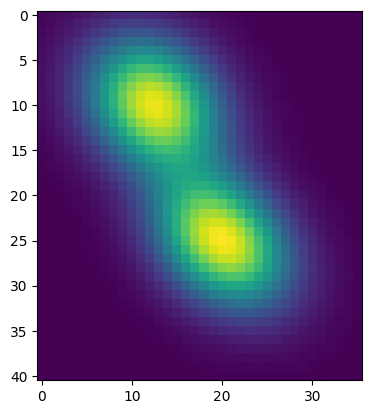

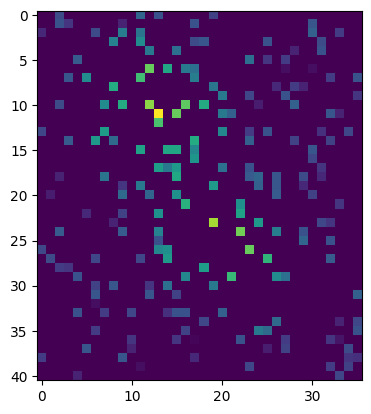

In [208]:
def showData(X, y, showticks=False):
    
    axis0index = np.sort(np.unique(XTrain[:, 0]))
    axis1index = np.sort(np.unique(XTrain[:, 1]))
    
    im = np.ones([len(axis0index), len(axis1index)])
   
    for loc, value in zip((X-X.min(0))//2, y):
        im[loc[0]][loc[1]] = value

    plt.imshow(im.T, interpolation="none")
    
    if showticks:
        plt.gca().set_xticks(np.arange(len(axis0index)))
        plt.gca().set_xticklabels(axis0index)
        plt.gca().set_yticks(np.arange(len(axis1index)))
        plt.gca().set_yticklabels(axis1index)
    
showData(XTest, yTest)
plt.show()
showData(XTrain, yTrain)
plt.show()

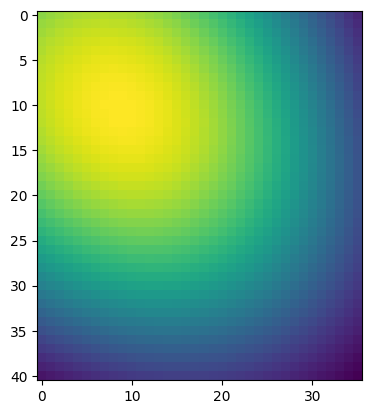

In [209]:
regr = svm.NuSVR()
regr.fit(XTrain, yTrain)
# regr.fit(XTest, yTest)

showData(XTest, regr.predict(XTest))

In [213]:
parameters = {
    'kernel': ['rbf'],
    'C': 2 ** np.arange(-2, 12.1, step=1),
    'gamma': 2 ** np.arange(-12, 0.1, step=1) 
}
svc = svm.NuSVR()
clf = GridSearchCV(svc, parameters, cv=10)
clf.fit(XTrain, yTrain)

GridSearchCV(cv=10, estimator=NuSVR(),
             param_grid={'C': array([2.500e-01, 5.000e-01, 1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00,
       1.600e+01, 3.200e+01, 6.400e+01, 1.280e+02, 2.560e+02, 5.120e+02,
       1.024e+03, 2.048e+03, 4.096e+03]),
                         'gamma': array([2.44140625e-04, 4.88281250e-04, 9.76562500e-04, 1.95312500e-03,
       3.90625000e-03, 7.81250000e-03, 1.56250000e-02, 3.12500000e-02,
       6.25000000e-02, 1.25000000e-01, 2.50000000e-01, 5.00000000e-01,
       1.00000000e+00]),
                         'kernel': ['rbf']})

In [214]:
gridc = clf.cv_results_['param_C']
gridc = gridc.reshape(parameters['C'].shape[0], -1)

gridgamma = clf.cv_results_['param_gamma']
gridgamma = gridgamma.reshape(parameters['C'].shape[0], -1)

gridtestscore = clf.cv_results_['mean_test_score']
gridtestscore = gridtestscore.reshape(parameters['C'].shape[0], -1)

gridstd = clf.cv_results_['mean_test_score']
gridstd = gridstd.reshape(parameters['C'].shape[0], -1)

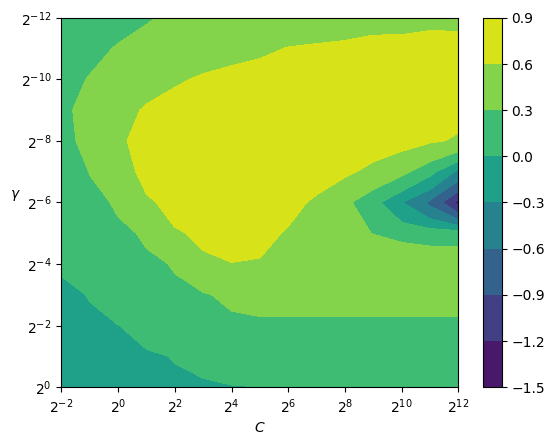

In [221]:
plt.contourf(gridc, gridgamma, gridtestscore)

plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.gca().invert_yaxis()

plt.xlabel("$C$", rotation='horizontal')
plt.ylabel("$\gamma$", rotation='horizontal')

plt.colorbar()